<a href="https://colab.research.google.com/github/tenten0727/SignateBeginner1/blob/master/SIGNATEbeginnerconpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google driveマウント

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


import

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from itertools import combinations


SBS(逐次後退選択)

In [ ]:
class SBS():
  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = estimator
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]

    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score]
    
    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim-1):
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      self.scores_.append(scores[best])
      dim -=1

    self.k_score = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score
  


    
    

データ取得・データ前処理

In [ ]:
# np.set_printoptions(threshold=50000) #省略する閾値設定
pd.set_option('display.max_columns', 100) #dataframeの表示行数制限

train_data = pd.read_csv('/content/gdrive/My Drive/SIGNATE/Beginner1/train.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/SIGNATE/Beginner1/test.csv')

#テストid
test_id = np.array(test_data["id"]).astype(int)

#特徴量削減
# train_data = train_data.drop(['id', 'job', 'default', 'education', 'contact', 'marital', 'housing', 'loan', 'poutcome', 'campaign', 'previous'], axis=1)
# test_data = test_data.drop(['id', 'job', 'default', 'education', 'contact', 'marital',  'housing', 'loan', 'poutcome',  'campaign', 'previous'], axis=1)


yes_no_mapping = {'no': 0, 'yes': 1}

train_data['default'] = train_data['default'].map(yes_no_mapping)
train_data['housing'] = train_data['housing'].map(yes_no_mapping)
train_data['loan'] = train_data['loan'].map(yes_no_mapping)

test_data['default'] = test_data['default'].map(yes_no_mapping)
test_data['housing'] = test_data['housing'].map(yes_no_mapping)
test_data['loan'] = test_data['loan'].map(yes_no_mapping)

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

train_data['month'] = train_data['month'].map(month_mapping)
test_data['month'] = test_data['month'].map(month_mapping)

train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

#目的変数と説明変数に分ける
X_train, y_train = train_data.drop('y', axis=1).values, train_data['y'].values

X_test = test_data.values

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=0) # stratify=y_trainはy_trainの分けた時の0, 1の比率をそろえる
X_train_train.shape


(18970, 32)

SBS適用

In [ ]:
forest = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=1, n_jobs=2)

sbs = SBS(forest, 4)
sbs.fit(X_train, y_train)
sbs.scores_

[0.9366789667896679,
 0.937859778597786,
 0.9381549815498155,
 0.9388929889298893,
 0.939630996309963,
 0.9397785977859778,
 0.9394833948339484,
 0.9402214022140222,
 0.9397785977859778,
 0.940369003690037,
 0.940369003690037,
 0.9402214022140222,
 0.9400738007380074,
 0.9399261992619926,
 0.9402214022140222,
 0.9402214022140222,
 0.9397785977859778,
 0.9402214022140222,
 0.939630996309963,
 0.9393357933579336,
 0.939630996309963,
 0.9385977859778598,
 0.9365313653136531,
 0.9368265682656827,
 0.9357933579335793,
 0.9338745387453875,
 0.9326937269372694,
 0.9322509225092251,
 0.9313653136531366]

検証用ランダムフォレスト

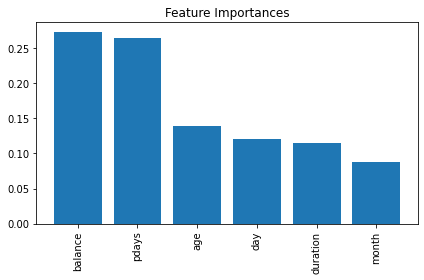

In [ ]:
feat_labels = train_data.drop('y', axis=1).columns
test_forest = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=1, n_jobs=2)
test_forest.fit(X_train_train, y_train_train)
importances = test_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importances')
plt.bar(range(X_train_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

test_predict = test_forest.predict(X_train_test)


性能

In [ ]:
print(accuracy_score(y_train_test, test_forest.predict(X_train_test)))

0.9207872078720787


本番用ランダムフォレスト

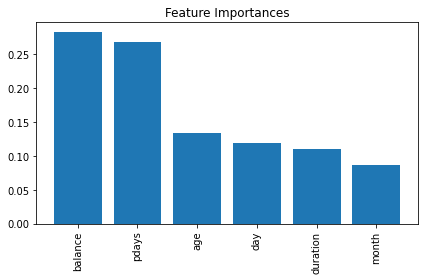

In [ ]:
feat_labels = train_data.drop('y', axis=1).columns
forest = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

predict = forest.predict(X_test)


結果をcsv出力


In [ ]:
MySolution = pd.DataFrame(predict.astype(float), test_id)

MySolution.to_csv('beginner-'+datetime.date.today().isoformat()+".csv", header=False) #headerなしで出力
from google.colab import files
files.download('beginner-'+datetime.date.today().isoformat()+".csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>